In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split



In [2]:
from sklearn.datasets import  load_boston

In [3]:
boston=load_boston()
#Here data is the input feature
#Here target are the output feature(price are in thousand dollars)
#When we load the data it is in the form of dictionary i.e. key:value pair

boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [9]:
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
bos.shape

(506, 13)

In [11]:
#Adding target to boston dataset

bos['target']=boston.target

In [12]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [13]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [14]:
bos.shape

(506, 14)

In [15]:
x=bos.iloc[:,0:-1]
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
y=bos.iloc[:,-1]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [19]:
x.shape

(506, 13)

In [20]:
y.shape

(506,)

In [22]:
#Breaking the data for training and testing
#test_size=.33 means 33% for testing and 67% for training
#random_state means selecting the random data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [24]:
#Using Linear Regression Algorithm

lm=LinearRegression()
lm.fit(x_train,y_train)
print('Score:',lm.score(x_train,y_train))
print('\n')
print('Coefficient:',lm.coef_)
print('\n')
print('Intercept:',lm.intercept_)
print('\n')
predlm=lm.predict(x_test)
print('Pridicted Value:',predlm)
print('\n')
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predlm))
print('Mean squared error:',mean_squared_error(y_test,predlm))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predlm)))
print('\n')
print('r2_score:',r2_score(y_test,predlm))

Score: 0.7392344370995025


Coefficient: [-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
 -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
  2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
 -5.47566338e-01]


Intercept: 33.334975755636066


Pridicted Value: [28.53469469 36.6187006  15.63751079 25.5014496  18.7096734  23.16471591
 17.31011035 14.07736367 23.01064388 20.54223482 24.91632351 18.41098052
 -6.52079687 21.83372604 19.14903064 26.0587322  20.30232625  5.74943567
 40.33137811 17.45791446 27.47486665 30.2170757  10.80555625 23.87721728
 17.99492211 16.02608791 23.268288   14.36825207 22.38116971 19.3092068
 22.17284576 25.05925441 25.13780726 18.46730198 16.60405712 17.46564046
 30.71367733 20.05106788 23.9897768  24.94322408 13.97945355 31.64706967
 42.48057206 17.70042814 26.92507869 17.15897719 13.68918087 26.14924245
 20.2782306  29.99003492 21.21260347 34.03649185 15.41837553 25.95781061
 39.13897274 22.96118424 18.80310558 33

# Biase Variance trade off is happen in both Regression and Classification so to avoid it use Regularization in Regression and Cross Validation for both Regression and Classification

# Regularization:: L1 and L2 Regularization

L1--------lasso Regression

L2--------Ridge Regression

L1+L2-----ElasticNet Regression

In [25]:
from sklearn.linear_model import Lasso,Ridge

In [26]:
# x_train,x_test,y_train,y_test

In [27]:
# will reduce the cofficient to zerp (those feature are not informative)

# Dfault Value of aplpha=1.0
# alpha  =.01
ls=Lasso(alpha=0.01)
#Ls=Lasso(alpha=1.0)  #Default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.7388011679233459

In [28]:
ls.coef_

array([-1.25914369e-01,  3.81843559e-02,  4.28962968e-02,  3.06048516e+00,
       -1.26460411e+01,  3.89365708e+00, -1.54331338e-02, -1.36626409e+00,
        2.26997832e-01, -8.52859972e-03, -8.89084016e-01,  1.18832679e-02,
       -5.57272128e-01])

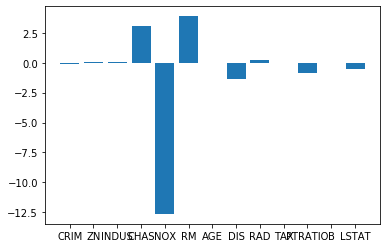

In [29]:
plt.bar(boston.feature_names,ls.coef_)
plt.show()

In [30]:
# try to minimize the coefficient variance

rd=Ridge(alpha=0.01)
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.7392335697037367

In [31]:
rd.coef_

array([-1.28623619e-01,  3.78413098e-02,  5.75169163e-02,  3.23564137e+00,
       -1.60087186e+01,  3.90253091e+00, -1.29890003e-02, -1.41982680e+00,
        2.34474926e-01, -8.22752996e-03, -9.26901697e-01,  1.17740690e-02,
       -5.47918339e-01])

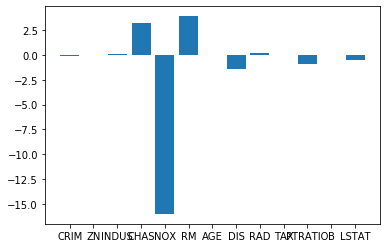

In [32]:
plt.bar(boston.feature_names,rd.coef_)
plt.show()

In [34]:
# ElasticNet is a combination of both Lasso and Ridge

from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.6857087110409116


array([-0.09994589,  0.0414197 , -0.        ,  0.        , -0.        ,
        1.00122839,  0.00769082, -0.74535126,  0.23768907, -0.01142708,
       -0.73557942,  0.01116325, -0.79230064])

In [36]:
from sklearn.svm import SVR

svr=SVR(kernel ='linear')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)


svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [37]:
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.6970507775069601
0.1888227759257125
0.1746863516580558


In [38]:
# Cross validating the Linear Regression() Algorithm

from sklearn.model_selection import cross_val_score

lm=LinearRegression()
score=cross_val_score(lm,x,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[ 0.64286835  0.6124552   0.51498797  0.78529513 -0.14696285 -0.00747687]
0.4001944881138518
0.3490468795601534
